In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from torchvision.utils import draw_segmentation_masks

from PIL import Image

import cv2
import numpy as np
from skimage import restoration, filters
from skimage.util import random_noise
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.io import imsave
import matplotlib.pyplot as plt
%matplotlib inline

### Colocando a pasta raiz do projeto na pasta da imagem.

In [6]:
%cd ../../../TCC/images/02_02/

d:\Documentos\Faculdade - UFPI\Weight Estimation\predict_ovinos\TCC\images\02_02


In [2]:
# Define the helper function
def decode_segmap(image, nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
                           # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                           (128, 0, 0), (0, 128, 0), (128, 128,
                                                      0), (0, 0, 128), (128, 0, 128),
                           # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                           (0, 128, 128), (128, 128, 128), (64,
                                                            0, 0), (192, 0, 0), (64, 128, 0),
                           # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                           (192, 128, 0), (64, 0, 128), (192, 0,
                                                         128), (64, 128, 128), (192, 128, 128),
                           # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                           (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
  rgb = np.stack([r, g, b], axis=2)
  return rgb


In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import torchvision.transforms as T
from skimage.color import rgb2gray


def segment(net, path):
  img = Image.open(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(512),
                   T.ToTensor(),
                   T.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  rgb_gray = rgb2gray(rgb)
  plt.imshow(rgb_gray, cmap="gray")
  plt.axis('off')
  plt.show()

  return rgb_gray


In [15]:
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights, DeepLabV3_ResNet101_Weights

weights = DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1
dlab = models.segmentation.deeplabv3_resnet101(
    weights=weights, progress=False).eval()

### Resize image

In [52]:
from PIL import Image
import os
import sys

dirs = os.listdir("jpeg")

def resize():
    for item in dirs:
        if os.path.isfile("jpeg/" + item):
            im = Image.open("jpeg/" + item)
            imResize = im.resize((256, 256), Image.ANTIALIAS)
            imResize.save("resized/" + 'r_' + item[:-5] + '.jpg', 'JPEG', quality=90)
            
resize()
            
# im = Image.open('amarelo.jpeg')
# imResize = im.resize((256,256), Image.ANTIALIAS)
# imResize.save("./resized/" + 'resized.jpg', 'JPEG', quality=90)


C:\Users\pedro\AppData\Local\Temp\ipykernel_1984\3979736113.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imResize = im.resize((256, 256), Image.ANTIALIAS)


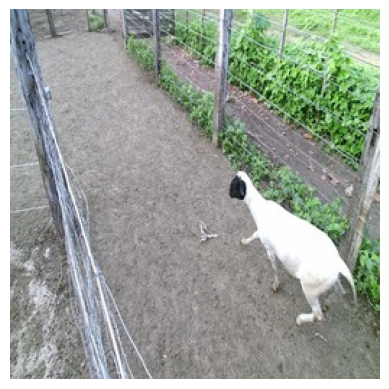

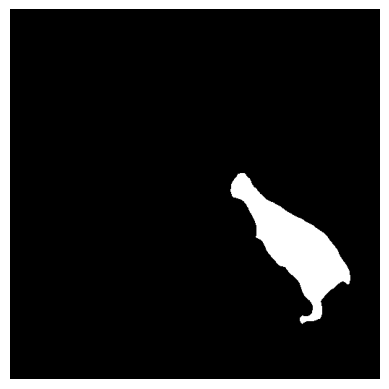

In [31]:
mask_1 = segment(dlab, 'resized/resized.jpg')
